## Contents
[Normalizing data](#normalizing-data)

[Categorical features plot](#categorical-features-plot)

[Correlation Matrix](#correlation-matrix)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')

## Normalizing data

In [3]:
df['overweight'] = np.where(df['weight'] / ((df['height'] / 100) ** 2) > 25, 1, 0)

In [4]:
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)

In [5]:
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)

In [6]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,1


## Categorical features plot

In [7]:
def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'],
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    df_cat['total'] = 1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()

    fig = sns.catplot(x='variable', y='total', col='cardio', hue='value', data=df_cat, kind='bar')

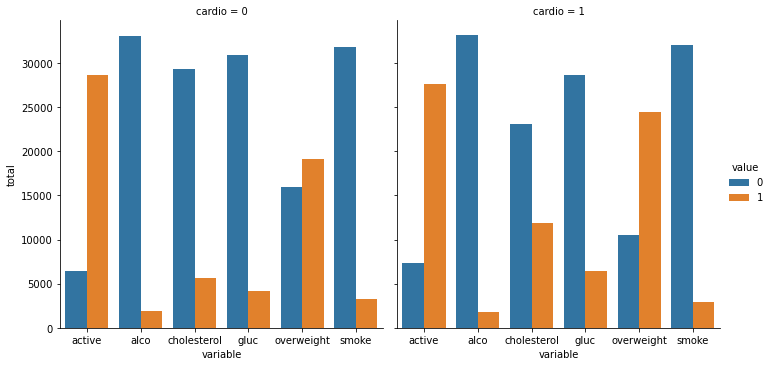

In [8]:
draw_cat_plot()

## Correlation Matrix

In [9]:
def draw_heat_map():
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi'])
        & (df['height'] >= df['height'].quantile(0.025))
        & (df['height'] <= df['height'].quantile(0.975))
        & (df['weight'] >= df['weight'].quantile(0.025))
        & (df['weight'] <= df['weight'].quantile(0.975))
        ]

    corr = df_heat.corr()

    mask = np.triu(corr)

    fig, ax = plt.subplots(figsize=(9, 9))

    sns.heatmap(round(corr, 1), linewidths=.1, mask=mask, vmax=.3, center=0.09, square=True, cmap="rocket", annot=True,
                cbar_kws={'orientation': 'vertical'})

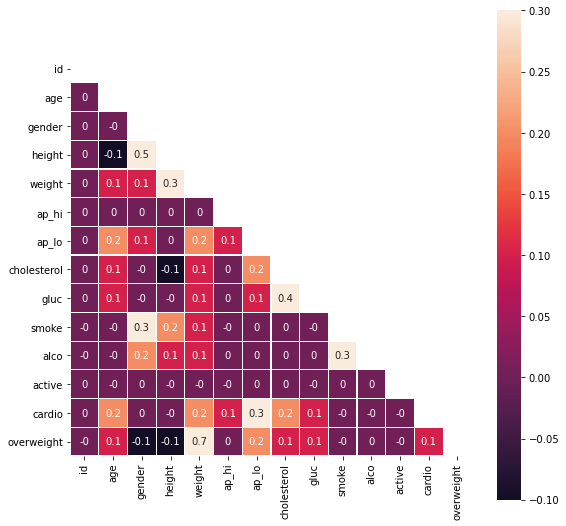

In [10]:
draw_heat_map()